## import required packages

In [20]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate
#below two packages are for feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [2]:
dataset=pd.read_csv('Clean_House_Data.csv')

In [3]:
dataset.head(5)

,price,postcode,property_subtype,rooms_number,area,terrace_area,garden_area,land_surface,facades_number,postcode_median_price,...,garden_False,garden_True,swimming_pool_has_False,swimming_pool_has_True,region_B,region_F,region_W,building_state_agg_good,building_state_agg_renovated,building_state_agg_to_renovate
0,295000.0,0.353648,0.7,0.500000,0.853896,0.546065,0.025000,0.869320,0.666667,0.127626,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,675000.0,0.859653,0.9,0.666667,0.934484,NaN,0.024425,0.879402,0.666667,0.136965,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,250000.0,0.335854,0.1,0.833333,0.903374,NaN,0.000000,0.795775,0.666667,0.101167,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,545000.0,0.022242,0.5,0.666667,0.847435,NaN,0.000000,0.497037,0.666667,0.295720,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,500000.0,0.021130,0.7,0.333333,0.832917,NaN,0.001500,0.631346,0.666667,0.229572,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [4]:
dataset['price']=np.log(dataset['price'])

In [5]:
dataset.fillna(dataset.mean(), inplace=True)

In [6]:
X=dataset.drop('price',axis=1)
y=dataset['price']

In [7]:
feature_select_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_select_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [8]:
#gives information to select the features True-select False-remove
feature_select_model.get_support()

array([ True, False,  True,  True, False, False,  True, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False,  True, False, False,  True])

In [9]:
selected_features=X.columns[(feature_select_model.get_support())]

In [10]:
X=X[selected_features]

In [11]:
X

,postcode,rooms_number,area,land_surface,postcode_median_price,property_subtype_median_price,house_is_False,open_fire_False,terrace_False,region_B,region_W,building_state_agg_to_renovate
0,0.353648,0.500000,0.853896,0.869320,0.127626,0.564805,0.0,1.0,0.0,0.0,1.0,0.0
1,0.859653,0.666667,0.934484,0.879402,0.136965,0.889340,0.0,1.0,1.0,0.0,0.0,0.0
2,0.335854,0.833333,0.903374,0.795775,0.101167,0.648169,0.0,1.0,1.0,0.0,1.0,1.0
3,0.022242,0.666667,0.847435,0.497037,0.295720,0.521760,0.0,1.0,1.0,1.0,0.0,0.0
4,0.021130,0.333333,0.832917,0.631346,0.229572,0.564805,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10048,0.333630,0.333333,0.665880,0.709237,0.124514,0.510485,1.0,1.0,0.0,0.0,1.0,0.0
10049,0.866326,0.166667,0.901184,0.709237,0.149416,0.510485,1.0,1.0,1.0,0.0,0.0,0.0
10050,0.113212,0.166667,0.583991,0.709237,0.294533,0.510485,1.0,1.0,0.0,0.0,0.0,0.0
10051,0.111210,0.166667,0.457695,0.709237,0.336187,0.136400,1.0,1.0,1.0,0.0,0.0,1.0


## Correaltion

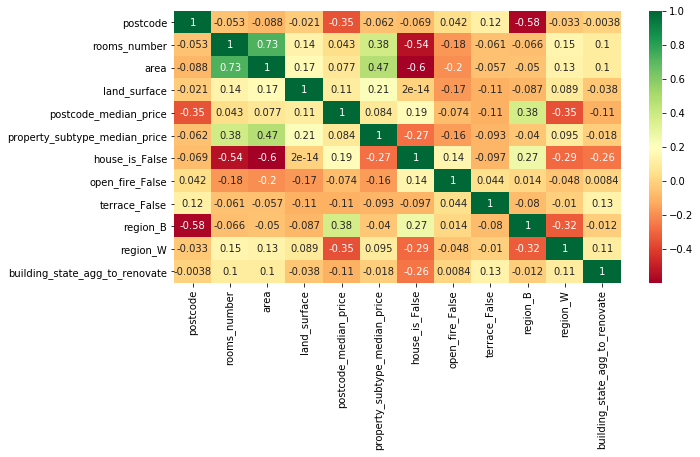

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn')

In [13]:
#import packages for linear regression and split data into train set and test set
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

In [14]:
#data is splitted into traning and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [15]:
# create linear regression object and fit data
lreg=LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#find predicted data
ytest_prediction=lreg.predict(X_test)
ytrain_prediction=lreg.predict(X_train)
print(ytest_prediction,ytrain_prediction)

[13.2103542  12.50838177 13.21641279 ... 13.34913802 11.80839294
 12.84693689] [12.57148441 12.39742652 12.69250616 ... 13.59756049 12.10678783
 12.89591796]


In [17]:
#compute accuracy and mean error
print('Mean Square error: ', mean_squared_error(y_test,prediction))
print('Accuracy: ', r2_score(y_test,prediction))

Mean Square error:  0.0939143789054922
Accuracy:  0.7259370520218514


In [90]:
class Model_Evaluation:

    def __init__(self, model):

        self.model = model

    def get_predictions(self, model, test_data, train_data):
        """
        Function provides predicted values from train data and test data.

        :param model: A model obejct that predicts the data
        :param test_data: an array that contains test data
        :param train_data: an array that contains train data

        :return: array of predicted train and test data
        """

        self.test_predictions = model.predict(test_data)
        self.train_predictions = model.predict(train_data)

        return self.test_predictions, self.train_predictions

    def predict_model(self, model, y_test, ytest_prediction, ytrain_prediction, y_train):
        """
        Function generates evaluation data on original inputs and predicted data.


        :param y_train: an array that contains  training input data
        :param ytrain_prediction: an array that contains predicted train data
        :param y_test: an array that contains  testing input data
        :param ytest_prediction: an array that contains predicted test data
        :return: set of metrics in table format and plot
        """

        self.mae = mean_absolute_error(y_test, ytest_prediction)

        self.mse = mean_squared_error(y_test, ytest_prediction)
        self.rmse = np.sqrt(self.mse)
        self.mape = (self.mse/y_test)*100
        self.train_score = r2_score(y_train, ytrain_prediction)
        self.test_score = r2_score(y_test, ytest_prediction)
        #print('Mean Absolute Error: ',self.mae)
        #print('Mean Squared Error: ',self.mse)
        #print('Root Mean Squqred Error: ',self.rmse)
        #print('Mean Absolute Percentage Error: ',self.mape)
        #print('RSquare : ',r2_score(original_data, predicted_data))
        # return self.mean_absolute_error, self.mean_squared_error, self.root_mean_squared_error, self.mean_absolute_percentage_error

        evaluation_data = pd.DataFrame(
            {'Y': y_test, 'Y_Predicted': predicted_data, 'MAPE': self.mape})
        #print('Table for Variation between Original and Predicted Values')
        #print(tabulate(evaluation_data, headers='keys', tablefmt='fancy_grid'))

        Results = pd.DataFrame({'MAE': self.mae, 'MSE': self.mse, 'RMSE': self.rmse,
                                'Train_RSquare': self.train_score, 'Test_RSquare': self.test_score}, index=['Values'])
        print('Evaluation Metrics')
        print(tabulate(Results, headers='keys', tablefmt='fancy_grid'))

        plt.subplot(1, 2, 1)
        # display plots
        plt.title('Actual vs Predicted Data')
        plt.scatter(y_test, ytest_prediction)

        plt.xlabel('Predicted')
        plt.ylabel('Actual')

        plt.subplot(1, 2, 2)
        plt.title('Residuals Distribution Plot')
        # histogram of the residuals. It tells how well the residuals are distributed from proposed model
        plt.hist(y_test-ytest_prediction)

    def predict_price(self, prop_type, postcode, area, rooms, garden, terrace, prop_condition):
        """
        Function predicts the price with random input data.


        :param prop_type: property type data
        :param postcode: postcode data
        :param area: area
        :param rooms: number of rooms
        :param garden: garden
        :param terrace: terrace
        :param prop_condition: proeprty condition
        :return: price value
        """
        self.loc_index = np.where(X.columns == postcode)[0]
        self.prop_condition_index = np.where(X.columns == prop_condition)[0]
        self.x = np.zeros(len(X.columns))
        self.x[0] = prop_type
        self.x[1] = rooms
        self.x[2] = area
        self.x[3] = terrace
        self.x[4] = garden
        if self.loc_index >= 0:

            self.x[loc_index] = 1
        if self.prop_condition_index >= 0:

            self.x[prop_condition_index] = 1

        return model.predict([x])[0]

Evaluation Metrics
╒════════╤══════════╤═══════════╤══════════╤═════════════════╤════════════════╕
│        │      MAE │       MSE │     RMSE │   Train_RSquare │   Test_RSquare │
╞════════╪══════════╪═══════════╪══════════╪═════════════════╪════════════════╡
│ Values │ 0.234146 │ 0.0939144 │ 0.306455 │        0.736412 │       0.725937 │
╘════════╧══════════╧═══════════╧══════════╧═════════════════╧════════════════╛


/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.
/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if sys.path[0] == '':


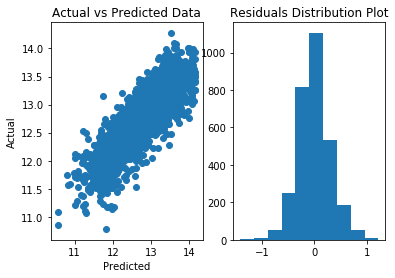

In [91]:
model=LinearRegression()
regressor = model.fit(X_train, y_train)
model_evaluation_obj=Model_Evaluation(model)
ytest_predictions,ytrain_predictions=model_evaluation_obj.get_predictions(model,X_test,X_train)
model_evaluation_obj.predict_model(model,y_test,ytest_predictions,ytrain_predictions,y_train)
predicted_price=predict_price(1,8300,100,3,1,0,'good')
